## Classificação

### Carregamento dos conjuntos de dados

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
print (iris.DESCR)
print(iris.data.shape)
print(np.unique(iris.target))

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

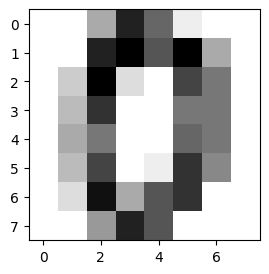

0


In [2]:
from sklearn import datasets
%matplotlib inline

digits = datasets.load_digits()
print (digits.DESCR)
print(digits.data.shape)

import matplotlib.pyplot as plt

plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r,
 interpolation='nearest')
plt.show()
print(digits.target[0])

# Dataset de dígitos em que pegaram em imagens e nos píxeis de cada imagem de números e dividiram as linhas em listas para classificar do 0 ao 10.
# 64 -> 8x8

### Exemplos com o dataset iris - treino do modelo e predição de valores para novos exemplos

In [3]:
indices = np.random.permutation(len(iris.data))
train_in = iris.data[indices[:-10]]
train_out = iris.target[indices[:-10]]
test_in = iris.data[indices[-10:]]
test_out = iris.target[indices[-10:]]

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
print(knn.fit(train_in, train_out))
print("Valores previstos:" , knn.predict(test_in))
print("Valores reais: " , test_out)


KNeighborsClassifier(n_neighbors=3)
Valores previstos: [2 0 1 2 2 0 0 1 2 0]
Valores reais:  [2 0 1 1 2 0 0 1 2 0]


In [4]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(train_in, train_out)
print(tree_model)
print(tree_model.predict(test_in))

print("Valores previstos: ", tree_model.predict(test_in))
print("Valores reais: ", test_out)

DecisionTreeClassifier()
[2 1 1 2 1 1 1 0 0 1]
Valores previstos:  [2 1 1 2 1 1 1 0 0 1]
Valores reais:  [2 2 1 2 1 1 1 0 0 1]


In [ ]:
# Este exemplo não é correto para avaliar modelos mas apenas para perceber a previsão de exemplos. O processo é correto mas a utilização de 10 exemplos é uma amostra demasiado pequena para o conjunto de treino.
# O processo de construção do modelo é sempre iniciado pelo fit.
# Podiamos calcular as métricas de avalição.

In [ ]:
# Gaussion, os cálculos são feitos com a distribuição normal.

In [4]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model = gnb_model.fit(train_in, train_out)
print(gnb_model)

print("Valores previstos: " , gnb_model.predict(test_in))
print("Valores reais: " , test_out)

GaussianNB()
Valores previstos:  [2 0 1 1 2 0 0 1 2 0]
Valores reais:  [2 0 1 1 2 0 0 1 2 0]


In [ ]:
# Apenas altera o classificador.
# Os modelos estão definidos com as definições default.

In [5]:
# Exemplos com o dataset digits - divisão da amostra 2/3 treino e 1/3 teste

In [6]:
numtst = int(digits.data.shape[0] / 3)
print("Numero de exemplos para teste: ", numtst)

indices_dig = np.random.permutation(len(digits.data))

dig_train_in = digits.data[indices_dig[:-numtst]]
dig_train_out = digits.target[indices_dig[:-numtst]]

dig_test_in  = digits.data[indices_dig[-numtst:]]
dig_test_out = digits.target[indices_dig[-numtst:]]

dig_train_in.shape, dig_train_out.shape, dig_test_in.shape, dig_test_out.shape

Numero de exemplos para teste:  599


((1198, 64), (1198,), (599, 64), (599,))

In [8]:
dig_knn = KNeighborsClassifier()
dig_knn.fit(dig_train_in, dig_train_out)
prev_knn = dig_knn.predict(dig_test_in)
prev_knn[1:20]

array([5, 4, 2, 1, 9, 1, 2, 5, 9, 7, 5, 4, 9, 4, 7, 5, 3, 2, 1])

In [9]:
## definindo funcao para PECC
def pecc (prev, real):
    return sum([ (prev[i]==real[i]) for i in range(len(prev)) ])/ len(prev)

print ("PECC: ", pecc(prev_knn, dig_test_out) )

PECC:  0.986644407345576


In [10]:
## em alternativa
from sklearn.metrics import accuracy_score
print("PECC (accuracy):", dig_knn.score(dig_test_in, dig_test_out))
print("PECC (accuracy):", accuracy_score(dig_test_out, prev_knn) )

PECC (accuracy): 0.986644407345576
PECC (accuracy): 0.986644407345576


In [ ]:
# score -> calcula métricas diferentes em modelos diferentes

In [11]:
from sklearn.metrics import confusion_matrix

confusion_matrix(dig_test_out, prev_knn)

array([[61,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 60,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 56,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 51,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 70,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 60,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 54,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 56,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 65,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  0, 58]])

In [12]:
tree_model_dig = tree.DecisionTreeClassifier()
tree_model_dig = tree_model_dig.fit(dig_train_in, dig_train_out)
prev_tree = tree_model_dig.predict(dig_test_in)
print("PECC (accuracy):", accuracy_score(dig_test_out, prev_tree) )

PECC (accuracy): 0.8447412353923205


In [13]:
gnb_model_dig = GaussianNB()
gnb_model_dig = gnb_model_dig.fit(dig_train_in, dig_train_out)
print("PECC (accuracy):", gnb_model_dig.score(dig_test_in, dig_test_out))

PECC (accuracy): 0.8213689482470785


## Regressão

In [7]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [15]:
indices_diab = np.random.permutation(len(diabetes.data))
X_train = diabetes.data[indices_diab[:-50]]
X_test = diabetes.data[indices_diab[-50:]]
y_train = diabetes.target[indices_diab[:-50]]
y_test = diabetes.target[indices_diab[-50:]]

In [16]:
from sklearn.tree import DecisionTreeRegressor

regr_tree = DecisionTreeRegressor()
regr_tree = regr_tree.fit(X_train, y_train)
print(regr_tree)
prev_diab = regr_tree.predict(X_test)
print("Valores previstos: " , prev_diab)
print("Valores reais: " , y_test)


DecisionTreeRegressor()
Valores previstos:  [197. 219.  65. 275. 185.  86. 214.  55.  48. 202. 131. 248.  65.  92.
  72. 215. 210. 180.  77.  72.  86. 180. 259. 283.  95.  44. 292. 142.
  72.  97. 214. 283. 233. 135.  49. 310. 120. 200. 171. 184.  97. 281.
 111. 111. 141.  51. 104.  83. 108. 191.]
Valores reais:  [196. 200.  74. 258. 140. 252. 217. 116.  59. 126. 257. 217.  63.  88.
  52. 258. 201. 243.  51.  88. 170. 264.  91. 236. 258.  39. 245. 182.
  81.  53.  97. 248.  91.  79. 138. 242. 190. 156. 131. 145.  83. 303.
  90.  69.  55. 253. 216.  43. 199. 283.]


In [17]:
regr_tree.score(X_test, y_test)

0.10006494386505083

In [18]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, prev_diab)

5673.66

In [19]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, prev_diab)

57.22

In [20]:
from sklearn.metrics import r2_score
r2_score(y_test, prev_diab)

0.10006494386505083